In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib
import pynance as pn   # ← PyNance


In [6]:
# Load your stock data (YOU MUST PLACE YOUR FILE IN THE SAME FOLDER)
df = pd.read_csv("../src/AAPL.csv")

# Standardize column names (important)
df.columns = df.columns.str.title()

# Make sure required columns exist
required_cols = ["Open", "High", "Low", "Close", "Volume"]
print("Found columns:", df.columns.tolist())

missing = [col for col in required_cols if col not in df.columns]
if missing:
    print("❌ Missing columns:", missing)
else:
    print("✅ All required columns found.")

# Convert Date column
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date")
else:
    print("⚠️ No Date column found.")


Found columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
✅ All required columns found.


In [7]:
# Moving Averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)

# RSI
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# MACD
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
    df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Bollinger Bands
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(
    df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2
)

# Stochastic Oscillator
df['slowk'], df['slowd'] = talib.STOCH(
    df['High'], df['Low'], df['Close'],
    fastk_period=14,
    slowk_period=3,
    slowd_period=3
)

print("✅ Technical indicators calculated!")
df.head()


✅ Technical indicators calculated!


,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist,upper_band,middle_band,lower_band,slowk,slowd
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Daily returns
# FIXED: Using the standard pandas method .pct_change()
df["Returns"] = df["Close"].pct_change()

# Rolling volatility (20-day)
df["Volatility_20"] = df["Returns"].rolling(20).std()

# Sharpe Ratio (simplified)
# Note: This is an unannualized, simplified 20-day Sharpe Ratio
df["Sharpe"] = df["Returns"].rolling(20).mean() / df["Returns"].rolling(20).std()

# Cumulative returns
df["Cumulative_Returns"] = (1 + df["Returns"]).cumprod()

print("✅ Financial metrics added using pandas!")
print(df.tail())

✅ Financial metrics added using pandas!
           Date       Close        High         Low        Open    Volume  \
3769 2023-12-22  191.788757  193.581821  191.164647  193.353962  37149600   
3770 2023-12-26  191.243912  192.076049  191.025969  191.798670  28919300   
3771 2023-12-27  191.342972  191.689703  189.302247  190.689158  48087700   
3772 2023-12-28  191.768951  192.838849  191.362784  192.323710  34049900   
3773 2023-12-29  190.728775  192.581275  189.936256  192.085953  42672100   

          SMA_20      SMA_50      EMA_20     RSI_14  ...  MACD_hist  \
3769  191.856618  183.572859  191.510231  54.672784  ...  -0.602115   
3770  192.018094  183.858864  191.484867  53.090049  ...  -0.744404   
3771  192.154308  184.149424  191.471353  53.354446  ...  -0.816041   
3772  192.362839  184.479567  191.499696  54.540999  ...  -0.816918   
3773  192.490633  184.814828  191.426275  51.121347  ...  -0.865101   

      upper_band  middle_band  lower_band      slowk      slowd   Retu

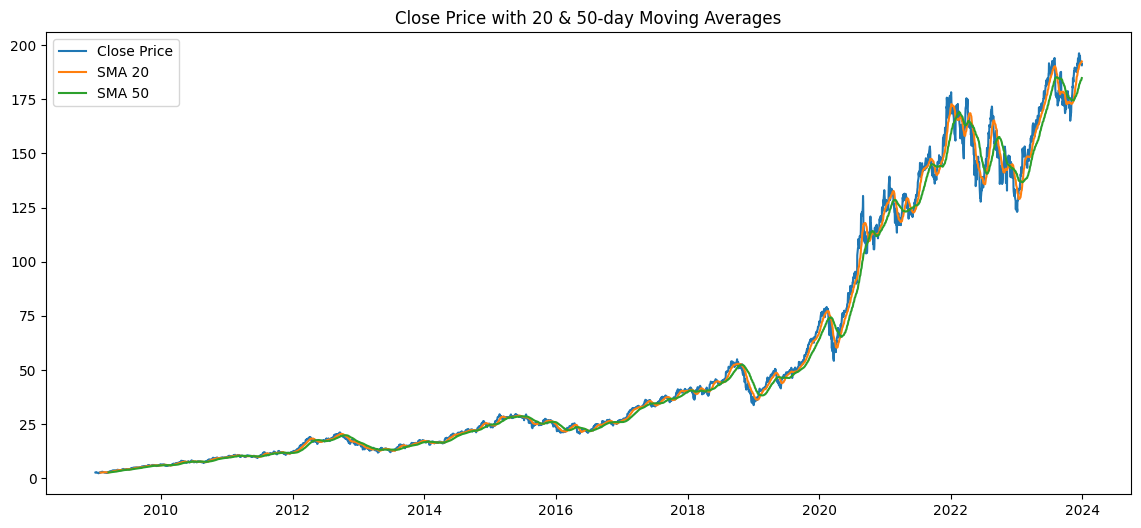

In [10]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.plot(df["Date"], df["SMA_20"], label="SMA 20")
plt.plot(df["Date"], df["SMA_50"], label="SMA 50")
plt.title("Close Price with 20 & 50-day Moving Averages")
plt.legend()
plt.show()


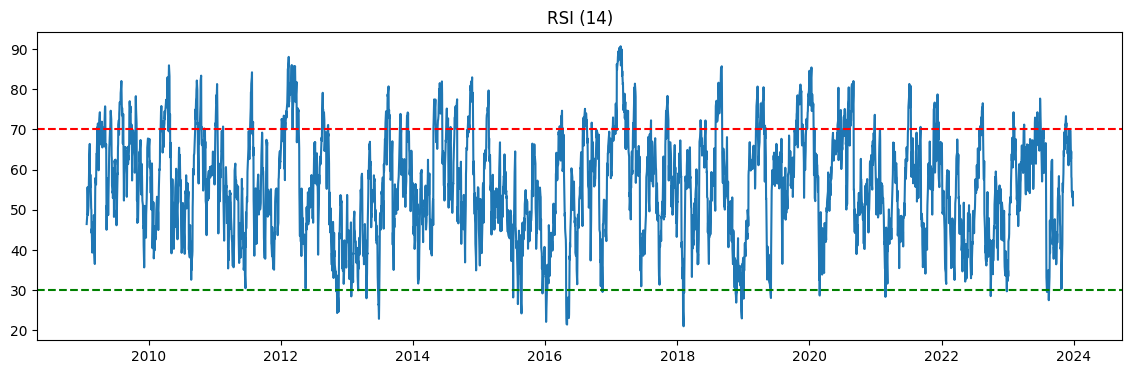

In [11]:
plt.figure(figsize=(14,4))
plt.plot(df["Date"], df["RSI_14"])
plt.axhline(70, color="red", linestyle="--")
plt.axhline(30, color="green", linestyle="--")
plt.title("RSI (14)")
plt.show()


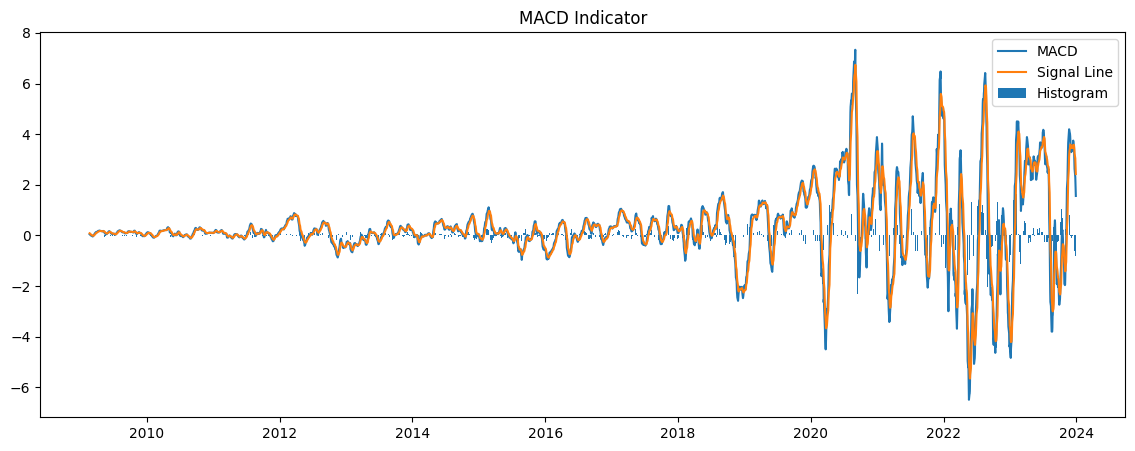

In [12]:
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["MACD"], label="MACD")
plt.plot(df["Date"], df["MACD_signal"], label="Signal Line")
plt.bar(df["Date"], df["MACD_hist"], label="Histogram")
plt.title("MACD Indicator")
plt.legend()
plt.show()


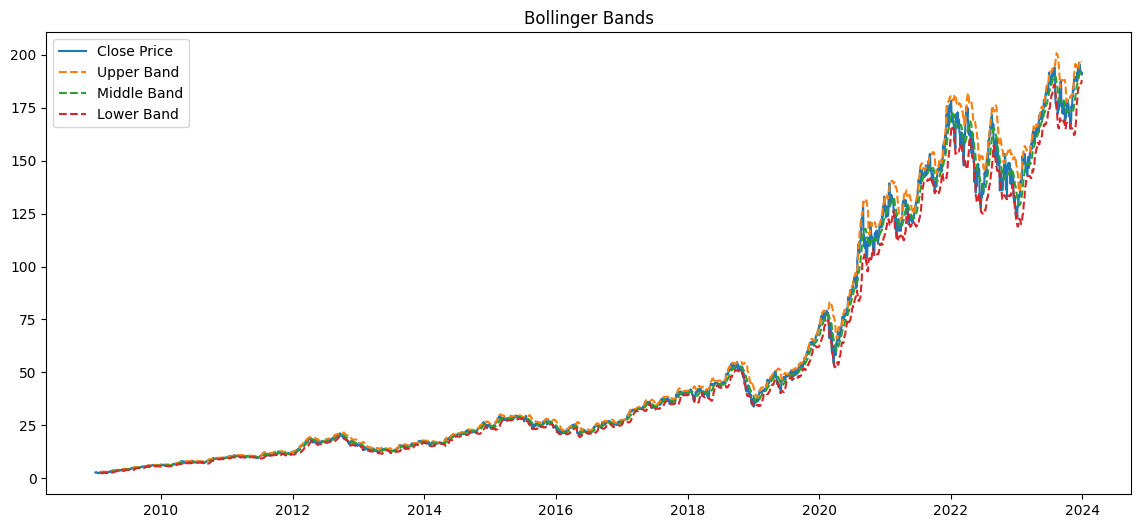

In [13]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.plot(df["Date"], df["upper_band"], label="Upper Band", linestyle="--")
plt.plot(df["Date"], df["middle_band"], label="Middle Band", linestyle="--")
plt.plot(df["Date"], df["lower_band"], label="Lower Band", linestyle="--")
plt.title("Bollinger Bands")
plt.legend()
plt.show()


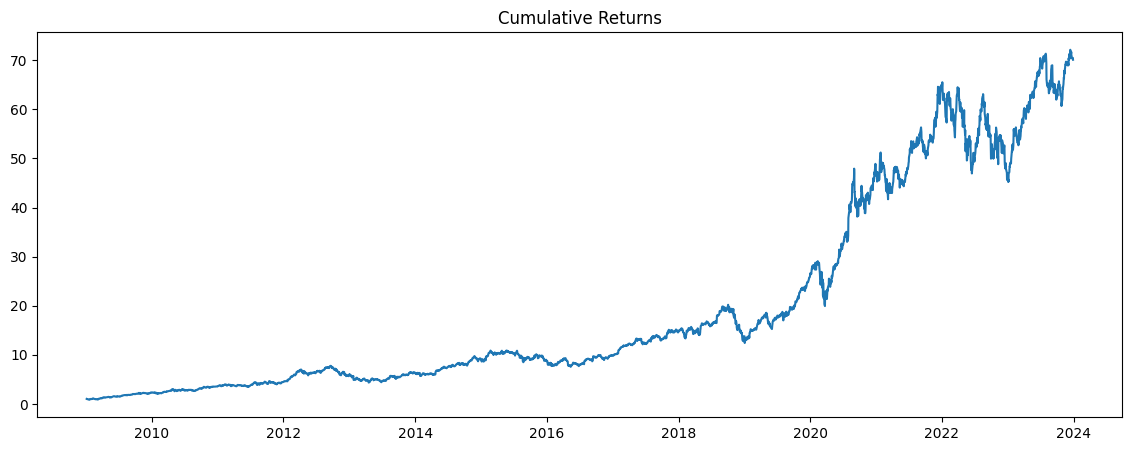

In [14]:
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["Cumulative_Returns"])
plt.title("Cumulative Returns")
plt.show()


In [15]:
summary = df[[
    "Close", "SMA_20", "SMA_50", "RSI_14",
    "MACD", "MACD_signal", "Volatility_20", "Sharpe"
]].tail(10)

summary


,Close,SMA_20,SMA_50,RSI_14,MACD,MACD_signal,Volatility_20,Sharpe
3764,195.721619,190.723320,181.953393,67.991716,3.745908,3.574956,0.008632,0.239471
3765,194.057343,191.030421,182.322577,62.680148,3.582111,3.576387,0.008942,0.184215
3766,195.097504,191.302353,182.682884,64.544428,3.495934,3.560297,0.008808,0.164776
3767,193.007248,191.509893,183.013258,58.247457,3.221832,3.492604,0.009141,0.123310
3768,192.858643,191.676816,183.312761,57.815603,2.958510,3.385785,0.009132,0.099969
3769,191.788757,191.856618,183.572859,54.672784,2.633141,3.235256,0.009071,0.108670
3770,191.243912,192.018094,183.858864,53.090049,2.304751,3.049155,0.009103,0.097899
3771,191.342972,192.154308,184.149424,53.354446,2.029104,2.845145,0.009086,0.083238
3772,191.768951,192.362839,184.479567,54.540999,1.823998,2.640915,0.008973,0.126834
3773,190.728775,192.490633,184.814828,51.121347,1.559539,2.424640,0.009078,0.078631
